In [3]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/xupeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
cd /home/xupeng/projects/synapse

/home/xupeng/projects/synapse


In [5]:
ls /home/xupeng/siyan/synapse/synEM/

synEM_train_data/                     synEM_train_label_new_channel_010.h5
synEM_train_data.zip                  synEM_train_label_new_channel_011.h5
synEM_train_label_002_2channel.h5     synEM_train_label_new_channel_012.h5
synEM_train_label_002.h5              synEM_train_label_new_channel_013.h5
synEM_train_label_new_channel_000.h5  synEM_train_label_new_channel_014.h5
synEM_train_label_new_channel_001.h5  synEM_train_label_new_channel_015.h5
synEM_train_label_new_channel_002.h5  synEM_train_label_new_channel_016.h5
synEM_train_label_new_channel_003.h5  synEM_train_label_new_channel_017.h5
synEM_train_label_new_channel_004.h5  synEM_train_label_new_channel_018.h5
synEM_train_label_new_channel_005.h5  synEM_train_label_new_channel_019.h5
synEM_train_label_new_channel_006.h5  synEM_train_label_new_channel_020.h5
synEM_train_label_new_channel_007.h5  synEM_train_label_new_channel_021.h5
synEM_train_label_new_channel_008.h5  synEM_train_raw_002.h5
synEM_train_label_new_channel_009.h5  s

In [8]:
with h5py.File('/home/xupeng/siyan/synapse/synEM/synEM_train_raw_002.h5') as f:
    raw_2 = f['main'][:]

In [9]:
with h5py.File('/home/xupeng/siyan/synapse/synEM/synEM_train_label_002.h5') as f:
    label_2 = f['main'][:]

In [10]:
raw_2.shape, label_2.shape

((201, 500, 500), (4, 201, 500, 500))

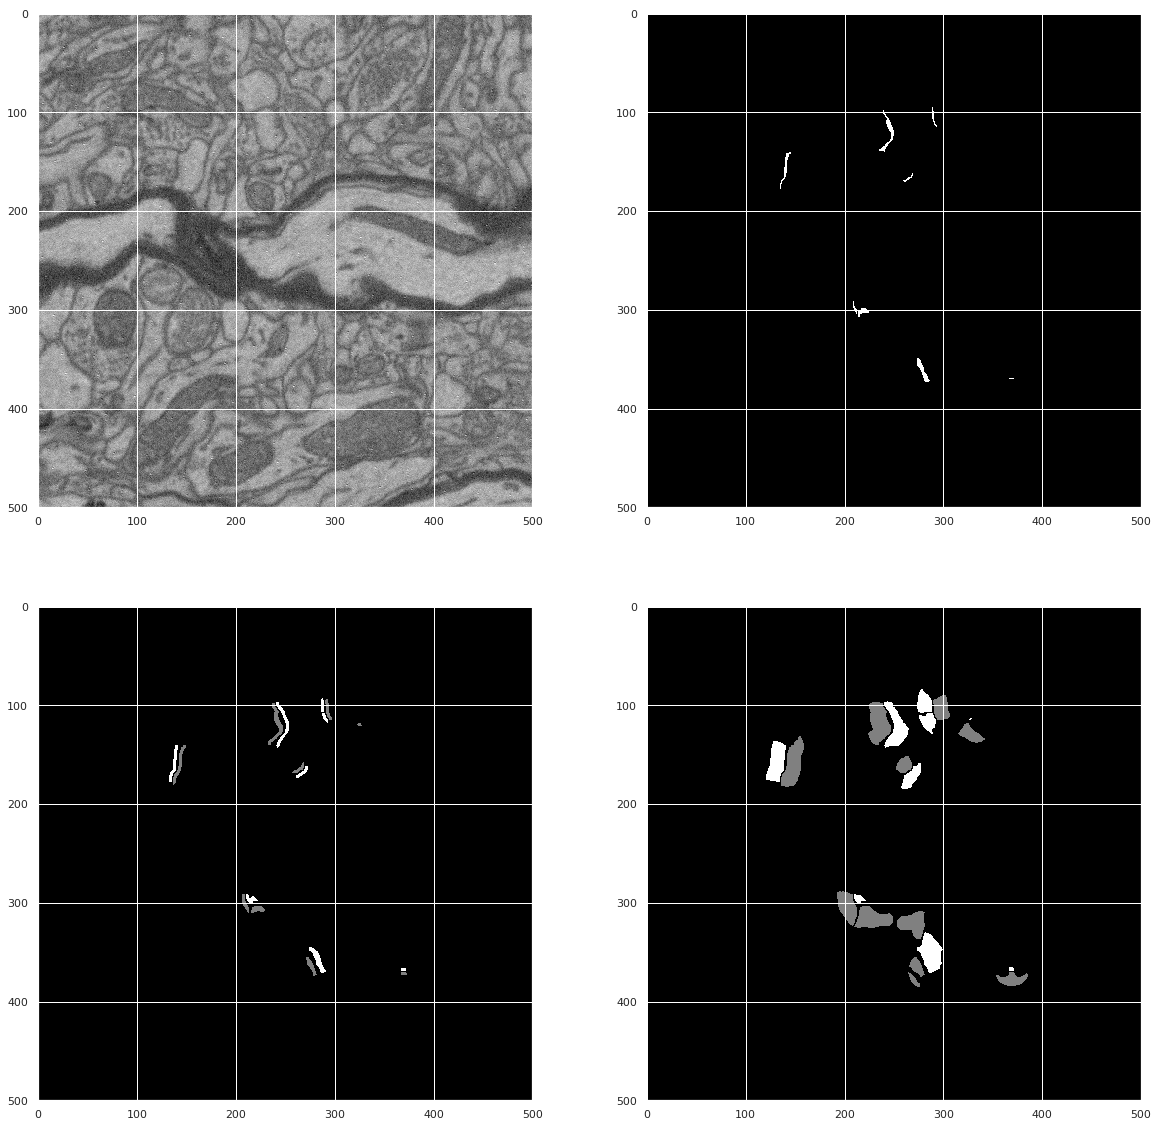

In [13]:
layerind = 50
fig,ax=plt.subplots(2,2,figsize=(20,20))
ax[0,0].imshow(raw_2[layerind],cmap='gray')
ax[0,1].imshow(label_2[0,layerind],cmap='gray')
ax[1,0].imshow(label_2[1,layerind],cmap='gray')
ax[1,1].imshow(label_2[3,layerind],cmap='gray')

In [23]:
ls /home/xupeng/projects/synapse/data/synEM/jwr/syn_vol1

im.h5*  jwr_syn_polarity.h5*  syn_gt.h5*  val_input.h5*  val_label.h5*


In [24]:
with h5py.File('/home/xupeng/projects/synapse/data/synEM/jwr/syn_vol1/jwr_syn_polarity.h5') as f:
    jwr = f['main'][:]

In [25]:
jwr.shape

(2, 105, 700, 700)

In [26]:
np.unique(jwr[0])

array([  0, 255], dtype=uint8)

In [27]:
np.unique(jwr[1])

array([  0, 255], dtype=uint8)

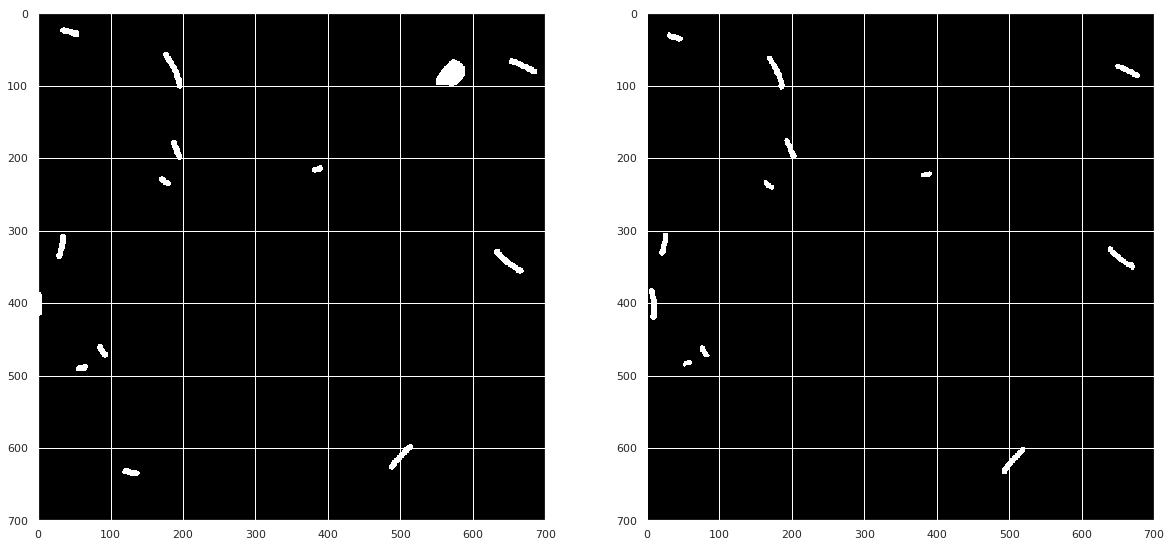

In [31]:
layerind = 50
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(jwr[0,layerind,:,:],cmap='gray')
ax[1].imshow(jwr[1,layerind,:,:],cmap='gray')

In [35]:
def produce_channel_one(imgs):
    '''    
    original channel 1's 128 as channel 0  (128 is post synaptic area) 128-255
    original channel 3's 255 as channel 1  (255 is pre synaptic area)  255-255
    '''
    assert len(imgs.shape) == 4
    shapes = imgs.shape
    images = np.ndarray([2,shapes[1],shapes[2],shapes[3]]).astype('uint8')
    images[0][np.where(imgs[1] ==128)] = 255
    images[1][np.where(imgs[3] ==255)]  = 255
    return images

In [36]:
label2 = produce_channel_one(label_2)

In [37]:
label_2.shape,label2.shape

((4, 201, 500, 500), (2, 201, 500, 500))

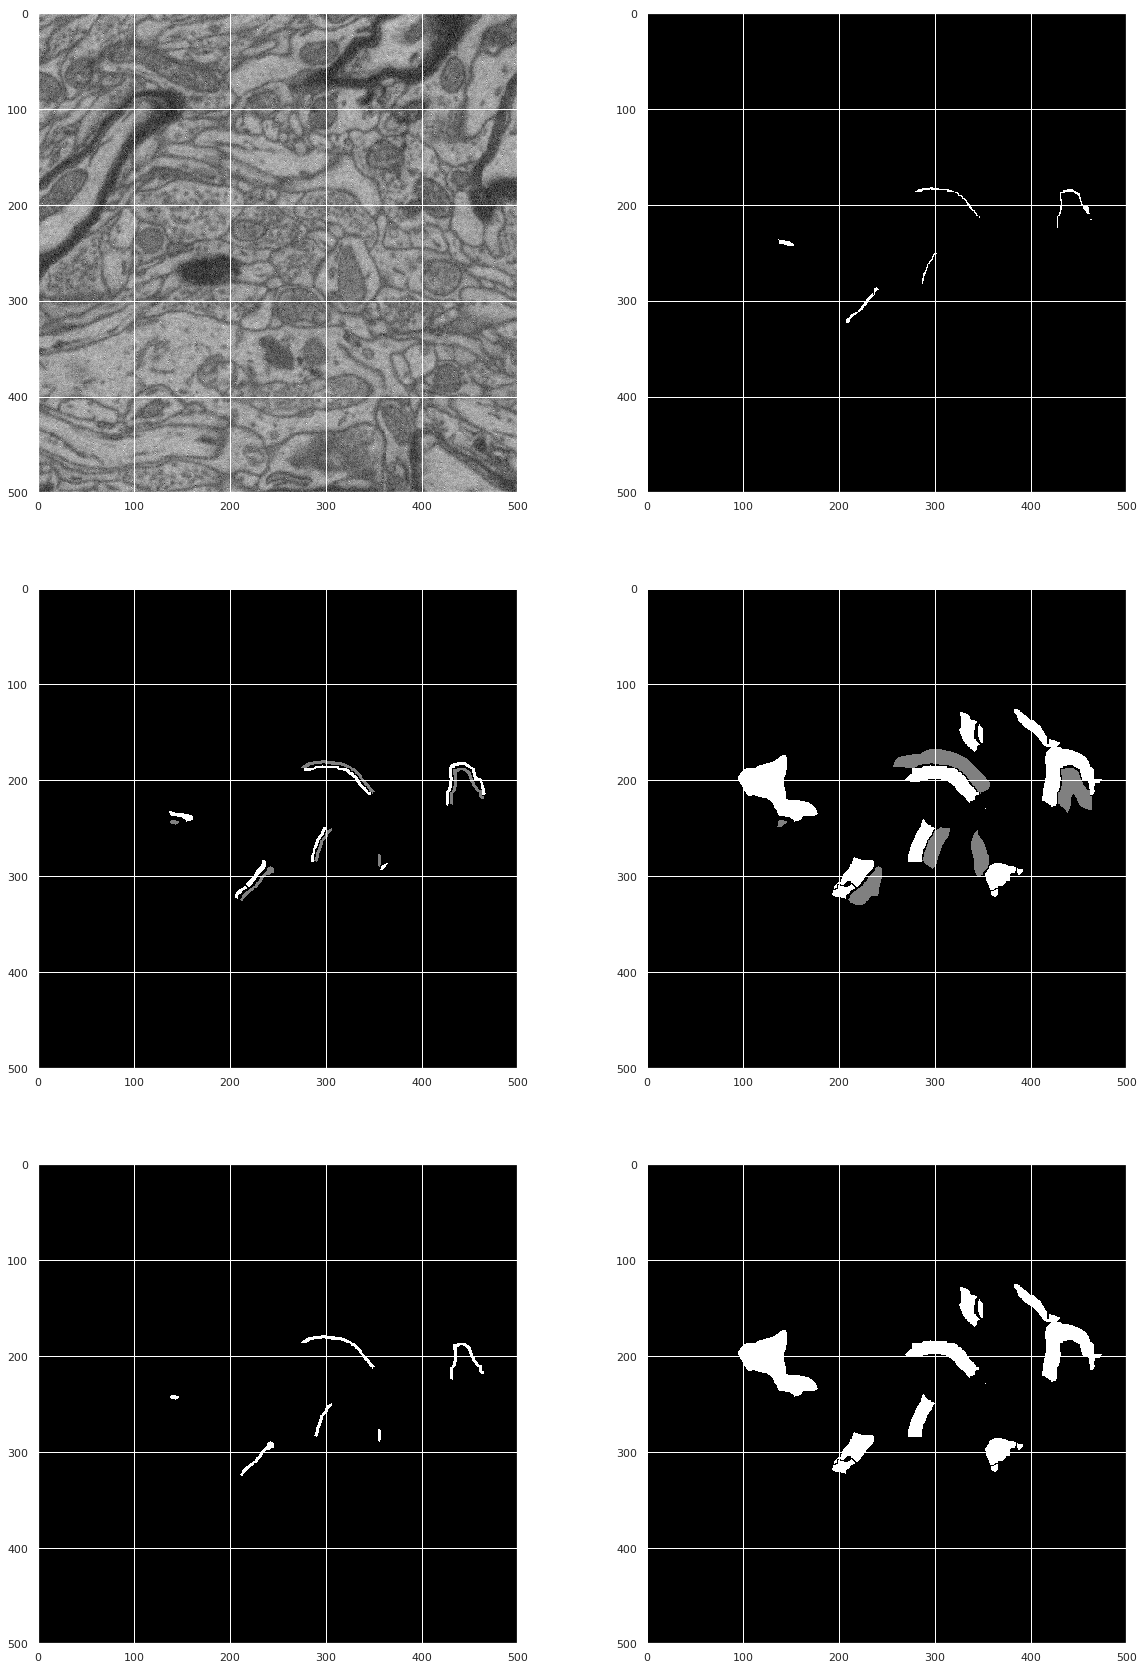

In [39]:
layerind = 50
fig,ax=plt.subplots(3,2,figsize=(20,30))
ax[0,0].imshow(raw_2[layerind],cmap='gray')
ax[0,1].imshow(label_2[0,layerind],cmap='gray')
ax[1,0].imshow(label_2[1,layerind],cmap='gray')
ax[1,1].imshow(label_2[3,layerind],cmap='gray')
ax[2,0].imshow(label2[0,layerind],cmap='gray')
ax[2,1].imshow(label2[1,layerind],cmap='gray')

In [40]:
label2.dtype

dtype('uint8')

In [41]:
with h5py.File('/home/xupeng/siyan/synapse/synEM/synEM_train_label_002_2channel.h5') as f:
    f.create_dataset('main',data=label2)

In [43]:
for i in os.listdir('/home/xupeng/siyan/synapse/synEM/synEM_train_data'):
    with h5py.File('/home/xupeng/siyan/synapse/synEM/synEM_train_data/'+i) as f:
        print (i, f['main'].shape)

synEM_train_label_027.h5 (4, 200, 500, 500)
synEM_train_label_002.h5 (4, 201, 500, 500)
synEM_train_label_037.h5 (4, 200, 500, 500)
synEM_train_raw_015.h5 (200, 500, 500)
synEM_train_raw_024.h5 (200, 500, 500)
synEM_train_raw_038.h5 (200, 500, 500)
synEM_train_label_007.h5 (4, 200, 500, 500)
synEM_train_label_024.h5 (4, 200, 500, 500)
synEM_train_raw_025.h5 (200, 500, 500)
synEM_train_label_004.h5 (4, 200, 500, 500)
synEM_train_label_035.h5 (4, 200, 500, 500)
synEM_train_label_032.h5 (4, 201, 500, 500)
synEM_train_label_008.h5 (4, 200, 500, 500)
synEM_train_label_025.h5 (4, 200, 500, 500)
synEM_train_label_021.h5 (4, 200, 500, 500)
synEM_train_raw_020.h5 (200, 500, 500)
synEM_train_label_009.h5 (4, 200, 500, 500)
synEM_train_raw_003.h5 (200, 500, 500)
synEM_train_label_001.h5 (4, 200, 500, 500)
synEM_train_label_018.h5 (4, 200, 500, 500)
synEM_train_label_031.h5 (4, 200, 500, 500)
synEM_train_raw_007.h5 (200, 500, 500)
synEM_train_raw_017.h5 (200, 500, 500)
synEM_train_label_013.h5 (4,

In [45]:
200*500*500

50000000

In [44]:
125*1250*1250*3

585937500

In [46]:
125*1250*1250*3/(200*500*500)

11.71875

In [6]:
def produce_channel_one(imgs):
    '''    
    original channel 1's 128 as channel 0  (128 is post synaptic area) 128-255
    original channel 3's 255 as channel 1  (255 is pre synaptic area)  255-255
    '''
    assert len(imgs.shape) == 4
    shapes = imgs.shape
    images = np.ndarray([2,shapes[1],shapes[2],shapes[3]]).astype('uint8')
    images[0][np.where(imgs[1] ==128)] = 255
    images[1][np.where(imgs[3] ==255)]  = 255
    return images

In [10]:
for i in tqdm(np.arange(28,40)):
    with h5py.File('/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_'+'{0:03}'.format(i)+'.h5') as f:
        print ('/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_'+'{0:03}'.format(i)+'.h5')
        print (i, f['main'].shape)
        newlabel = produce_channel_one(f['main'][:])
        with h5py.File('/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_new/synEM_train_label_new_channel_'+'{0:03}'.format(i)+'.h5') as f:
            f.create_dataset('main',data=newlabel)

/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_028.h5
28 (4, 200, 500, 500)
/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_029.h5
29 (4, 200, 500, 500)
/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_030.h5
30 (4, 200, 500, 500)
/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_031.h5
31 (4, 200, 500, 500)
/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_032.h5
32 (4, 201, 500, 500)
/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_033.h5
33 (4, 200, 500, 500)
/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_034.h5
34 (4, 200, 500, 500)
/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_035.h5
35 (4, 200, 500, 500)
/home/xupeng/siyan/synapse/synEM/synEM_train_data/label_old/synEM_train_label_036.h5
36 (4, 200, 500, 500)
/home/xupeng/siyan/synapse/synEM/synE

In [ ]:
ls